# A Lattice for High Order Collatz Cycles

A pair of integral lattices for the numerator and denominator of higher order Collatz cycles are extracted from representative matrices and explored.  A number of interesting features are presented. 

In [17]:
import CollatzNDLattice.generator as gen
import numpy as np
import random

## Figure 1 – The beginnings of the lattice
The first 5 generations of the lattice are shown.  The Numerators are pink and denominators blue.  The well known 1,2,1,2.. cycle is highlighted in green and its corollary 2,1,2,1 ... is highlighted in yellow.  These are both shown to generation 7.  The circular number identify solution sets that are further described below. The cycle that is the root of all normal Collatz solutions is also noted in the diagram.  

TODO:  I clearly need to update this.  Looks like I have _1010... and _0101... swapped.

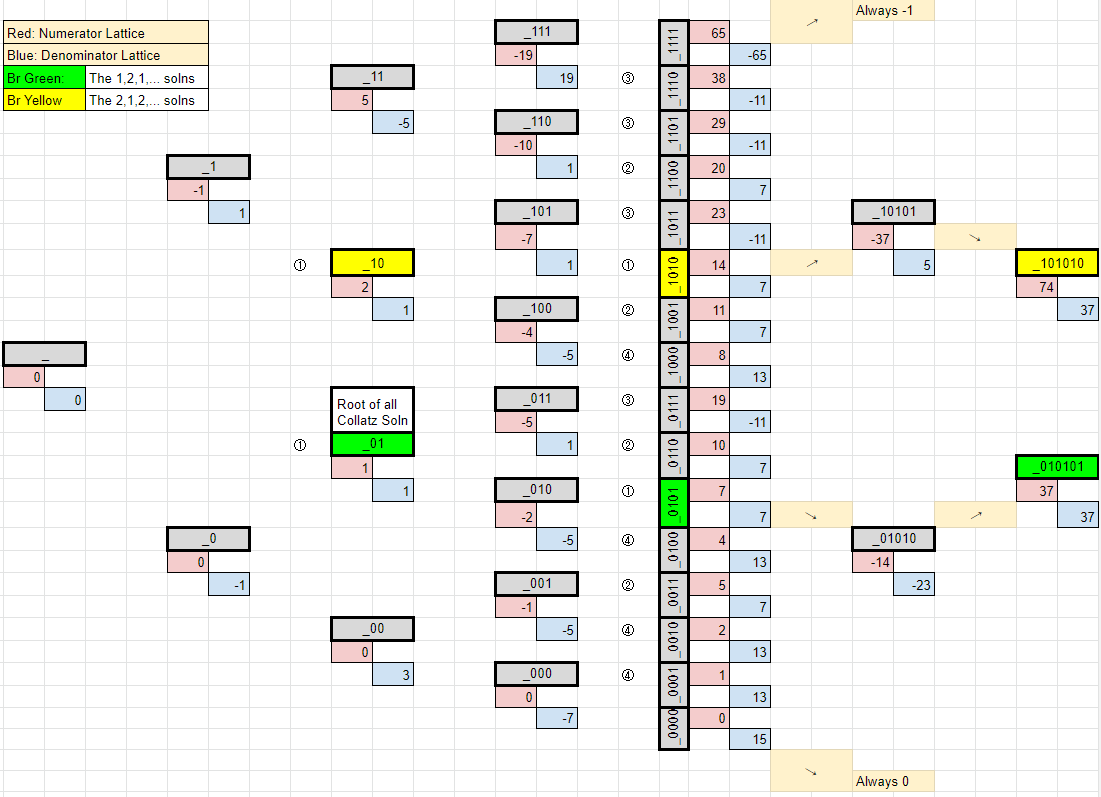

# Some Lattice Properties

  1. Two distinct operators named Up and Dn exist for both the denominator and the numerator
  2. Both denominator operators are commutative
  3. The Dn numerator operator is commutative
  4. The Up numerator operator is not commutative
  5. The $\_00$... lattice parameters can be derived from just their generation index (or matrix rank)
  6. Walking from bottom to top (0 to -1) of the values of a given generation can be done using simple linear transforms since the Dn operator is commutative and has an inverse.
  7. Because the denominator is fully commutative, the value of a denominator only depends on the number of 1's and 0's in its label.
  8. The value of a numerator, in part, depends on the "2-factor" of the denominator of the previous generation.
  9. The known 1,2,1... and 2,1,2,1 solutions coincide with denominators that follow the A005061 sequence $ 4^n - 3^n $ in the odd generations which can be derived from odd-ranked matrices
  10. The 1,2,1,... and 2,1,2,.. solutions lie at a "constant position" in the lattice: 0,{set 1},1_soln,{set 2},2_soln,{set 3},-1  where the in-between sets are all size (2^{rank-1} -2)/3.
  11. The upper \_111... numerator values are the sequence $ (-1)^{n}( 3^{n} - 2^{n} ) $ which is $ (-1)^{n} × OEIS\ sequence \ A001047 $ and the demoninators are $ -1\ \cdot numerator $
  12. The lower \_000... denominator values are $ (-1)^{n}(2^{n} - 1) $ and the numerators are always 0.
  13. The sum of the denominators of the odd generations = 0
  14. There are interesting patterns in the sums of the numerators and denominators in general.  Note that for odd lengthed cycles from the even ranked matrix solutions that is not until rank 10 that the magnitude of the sum of the numerators (odd ranks) gets larger than the sum of the denominators (even ranks).  At first glance that is an important inflection point, fortunately it does not come after our ability to exhaustively solve.

## The Operators

### The state vector
$[n, a, b, t]$

  - $n: $ The current numerator
  - $a: $ The denominator "3-factor"
  - $b: $ The denominator "2-factor"
  - $t: $ The numerator addend
  - $a + b: $ The current denominator

$[n, a, b, t]_{0} = [0,-1,1,-1] $

### Up

  - $n_{g+1} = -2n_{g} + t_{g} $ 
  - $a_{g+1} = -3a_{g} $ 
  - $b_{g+1} = -2b_{g} $ 
  - $t_{g+1} = -3t_{g}  $ 



### Down

  - $n_{g+1} = -1n_{g} $ 
  - $a_{g+1} = -1a_{g} $ 
  - $b_{g+1} = -2b_{g} $ 
  - $t_{g+1} = -1t_{g} + b_{g} \ \ \ \ \ \ $ ← A link between numerator and denominator


## The operators as matrices:

### Up

```
nd_op_up = np.array([
    [-2,   0,  0,  1 ],
    [ 0,  -3,  0,  0 ],
    [ 0,   0, -2,  0 ],
    [ 0,   0,  0, -3 ]
])

```

### Down
```
nd_op_dn = np.array([
    [-1,  0,  0,  0 ],
    [ 0, -1,  0,  0 ],
    [ 0,  0, -2,  0 ],
    [ 0,  0,  1, -1 ]
])

```

# Solution Observations

## All values associated with a cycle will be present in the lattice in the same generation

We see this with the 1,2,1,... cycle.  The reason is that even though the lattice is comprised of just the "first" value of each solution, each generation will contain all permutations of the arrangement of the generator matrices which will include the rearrangements of a given solution.

This means that the **first** time that a new long all-integer cycle (that does not include 1 or 2) appears THEN $\ rank-1\ $ **of** $ 2^{rank-1 } $ lattice values of the solution will belong to the new cycle solution.  

This requirement that all associated integers appear whole-cloth also seems to reduce the likelihood of a higher order solution.

## All cycles will repeat infinitely on their cycle length

We see this with the 1,2,1,... cycle which we see at ranks 3,5,7,9,

Odd cycles therefore alternate between even and odd ranks while even cycles stay on odd ranks.  There can be no even cycles on even ranks.

## Solutions start at rank=3

Even though the lattice generators are nicely consistent starting from the rank 1 single-valued matrices, there are no Collatz cycles until the rank 3 matrices.


## Solutions come in sets

For instance in the 1,2 case, \_01 and \_10 form a solution set of size 2 as they are mutually invariant under rotation of their binary label.  In general, rotations of the label digits are related solutions.  For instance these solutions are the same cycle:  \_0011, \_1001, \_1100, \_0110.

If there are longer-cycle integer solutions, they must come in sets.

The denominator is the same across the solutions of a set because the number of 1's and 0's in the label does not change in a set and the denominator generator is commutative.

The OEIS sequence https://oeis.org/A000031  gives the numer of sets in a generation.  Set sizes (ignoring 0 bottom and -1 top singular values):

 - Odd ranks
     - rank 3:   1×size(2)  
     - rank 5:   1×size(2), 3×size(4)
     - rank 7:   1×size(2), 2×size(3),  9×size(6)
     - rank 9:   1×size(2), 3×size(4),  30×size(8)
     - rank 11:  1×size(2), 6×size(5), 99×size(10)
     - rank 13:  1×size(2), 2×size(3),  3×size(4), 9×size(6), 335×size(12)
 - Even ranks
     - rank 4: 2×size(3)  
     - rank 6: 6×size(5)
     - rank 8: 18×size(7)
     - rank 10: 2×size(3) + 56×size(9)
     - rank 12: 186×size(11)
     - rank 14: 630×size(13)

The restrictions on the composition of the above sets comes from the limitations of rotating binary vectors, not algebra.

The solutions that we care about must come in set sizes of $ rank-1 $ (which appears to always be possible)

All sets that are not the _00... or _11... set must each have at least one member that satisfies each of the patterns:
  - \_...01
  - \_...10

There may be a proof by contradiction available due to the above since we can establish an algebraic relationship between these two members of a set.


## Solutions have contraints based on the mathematics of counting invariance under rotation of binary vectors

This is a simple consequence of the set finding above.

https://oeis.org/A000031
 - Number of n-bead necklaces with 2 colors when turning over is not allowed
 - Number of output sequences from a simple n-stage cycling shift register
 - Number of binary irreducible polynomials whose degree divides n
 - (1/n) * Dirichlet convolution of phi(n) and 2^n, n>0 
 - Jianing Song shows that a(n) is even for n!={0,2} ... the # of sets, not the content of the sets

## Numerators must be same sign
In order for a solution to be a Collatz solution, the numerators of a solution cycle must all be same sign and be the same as the denominator

 - We may be able to find limits on the ratio of 1's and 0's in a solution set related to this

## max(set) - min(set) >= set_size * denominator
In order for there to be set_size distinct solutions that are integers, they have to at least be spaced far enough apart that we can have that set_size integers.

 - We may also be able to find limits on the ratio of 1's and 0's in a solution set related to this
 
## Every solution set will have a member between _0101... and _1010...

This falls out of the requirement that each cycle will have a least one zero or one and the label must be rotated.

 

# Test

randomly generate a long lattice path and verify against the matrix solution

In [19]:
def test_generator():
    label = "_"
    node = gen.NodeRoot()
    for i in range(40):
        j = random.choice([0,1])
        node = node.forward(j)
        label = label + str(j)
        
    path_tup = node.tup()
    mat_tup, x = gen.solutionFromLabel(label)
    
    return path_tup, mat_tup

test_generator()

((2862405609521, 1099124207287), (2862405609521, 1099124207287))

# Solutions between _0101... and _1010...

In [33]:
def between():
    # Start at gen 15:
    node_upper = gen.NodeRoot()
    node_lower = gen.NodeRoot()
    for i in range(15):
        node_upper = node_upper.forward((i+1)%2)
        node_lower = node_lower.forward((i)%2)
    # work our way through the middle !!! Get overflow errors if we go over 48
    for i in range(0, 48, 2):
        node_upper = node_upper.forward(0)
        node_lower = node_lower.forward(1)
        t = node_upper.tup()
        mat_tup, x = node_upper.solveMatrix()
        possible = 0
        if min(x) > 0.0 and ((max(x)-min(x))/(node_upper.rank - 1)) >= 0.99999999999999999:
            possible = 1
        print(node_upper.label, t, t[0]/t[1],  possible)
        t = node_lower.tup()
        mat_tup, x = node_lower.solveMatrix()
        possible = 0
        if min(x) > 0.0 and ((max(x)-min(x))/(node_lower.rank - 1)) >= 0.99999999999999999:
            possible = 1
        print(node_lower.label, t, t[0]/t[1], possible )

between()       

_1010101010101010 (58975, 58975) 1.0 0
_0101010101010101 (117950, 58975) 2.0 0
_10101010101010100 (-58975, -124511) 0.4736529302631896 0
_01010101010101011 (-419386, -111389) 3.7650575909649966 0
_101010101010101000 (58975, 255583) 0.23074695891354277 0
_010101010101010111 (1389230, 203095) 6.840296413008691 0
_1010101010101010000 (-58975, -517727) 0.11391138573031732 0
_0101010101010101111 (-4429834, -347141) 12.76090695135406 0
_10101010101010100000 (58975, 1042015) 0.056597073938474976 0
_01010101010101011111 (13813790, 517135) 26.712154466435262 1
_101010101010101000000 (-58975, -2090591) 0.02820972634054198 0
_010101010101010111111 (-42489946, -502829) 84.50178092353464 1
_1010101010101010000000 (58975, 4187743) 0.014082764868808807 0
_0101010101010101111111 (129566990, -588665) -220.10309768713955 0
_10101010101010100000000 (-58975, -8382047) 0.007035870832029455 0
_01010101010101011111111 (-392895274, 5960299) -65.91871884279631 0
_101010101010101000000000 (58975, 16770655) 0.00

In [32]:
len("_10101010101010100000000000000000000000000000000000000000000000"), 63-15

(63, 48)

## Viable Zone in "BETWEEN"

Unfortunately, it looks like there is a zone where positive rational numbers can be generated.  Was hoping this would not be the case.  

We see 2 nodes that belong to all-positive solution sets and have sufficient range in values:

  - _01010101010101011111 - rank 15 + 6 = 21
  - _010101010101010111111 - rank 15 + 8 = 23

What causes sets to only produce all positive values other than 1,2 ... ?

In [34]:
len("_01010101010101011111")

21

# _1010... and $4^{i} - 3^{i} $

TODO: Finish this section

### UpDown

  - $n_{g+2} = -1 \cdot ( -2n_{g} + t_{g} ) \ \ \ \ , n_{0} = 0 $ 
  - $a_{g+2} = -1 \cdot ( -3a_{g} ) \ \ \ \ , a_{0} = -1 $ 
  - $b_{g+2} = -2 \cdot (-2b_{g} ) \ \ \ \ , b_{0} = 1 $ 
  - $t_{g+2} = -1 \cdot (-3t_{g} ) + -2 \cdot b_{g} \ \ \ \ , t_{0} = -1 $
  
#### De-sequenced

  - $n_{j} = 2^{j} + t_{j} $
  - $a_{j} = -3^{j} $
  - $b_{j} = 4^{j} $
  - $t_{j} = -( 2 \cdot 4^{j} - 3^{j}) $


In [16]:
for j in range(10):
    print((j, 4**j - 3**j))

(0, 0)
(1, 1)
(2, 7)
(3, 37)
(4, 175)
(5, 781)
(6, 3367)
(7, 14197)
(8, 58975)
(9, 242461)


In [11]:
gen.NodeRoot().vec

array([ 0, -1,  1, -1])

In [12]:
gen.NodeRoot().forward(1).forward(0).vec

array([ 1, -3,  4, -5])

In [13]:
gen.NodeRoot().forward(1).forward(0).forward(1).forward(0).vec

array([  7,  -9,  16, -23])

In [14]:
gen.NodeRoot().forward(1).forward(0).forward(1).forward(0).forward(1).forward(0).vec

array([  37,  -27,   64, -101])

In [15]:
gen.NodeRoot().forward(1).forward(0).forward(1).forward(0).forward(1).forward(0).forward(1).forward(0).vec

array([ 175,  -81,  256, -431])

## t of UpDn is the negative of OEIS sequence A085350: 

$ a(j) = 2 \cdot 4^{j} - 3^{j} $

We wind up with the fraction:

$ \Large f_{updn}(j) = \frac{2^j - (3^{j} - 2 \cdot 4^{j})}{4^{j} - 3^{j}} $

